In [9]:
from qiskit import transpile
from qiskit_aer import Aer, AerSimulator, AerJob

def execute(circuits, backend=None, shots=1024, **kwargs):
    if backend is None:
        backend = AerSimulator()
        
    # Transpile the circuits for the backend
    transpiled_circuits = transpile(circuits, backend)
    
    # Run the circuits on the backend
    job = backend.run(transpiled_circuits, shots=shots, **kwargs)
    
    return job

backend = Aer.get_backend('statevector_simulator')

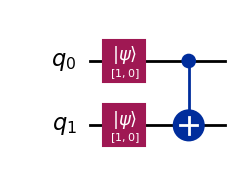

In [13]:
from math import sqrt
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram

# Define the quantum circuit
qc = QuantumCircuit(2)

# Initialize the qubits 
qc.initialize([1,0], 0)
qc.initialize([1,0], 1)

# Apply the CNOT gate
qc.cx(0,1)

# Visualize the circuit
qc.draw('mpl')

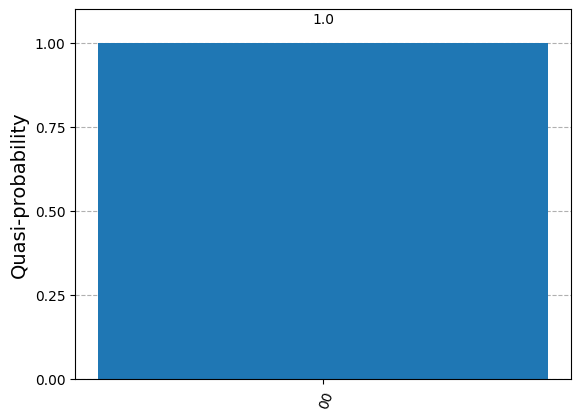

In [14]:
# Tell Qiskit how to simulate the circuit
backend = Aer.get_backend('statevector_simulator')

# execute the qc
results = execute(qc,backend).result().get_counts()

# plot the results
plot_histogram(results)